In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings('ignore')

#Train models libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


#Evaluation librarties
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

#Save models
from joblib import dump

In [13]:
# Step 1: Load the cleaned combined dataset
file_path = 'Data/combined_user_profiles.csv'
df = pd.read_csv(file_path)

# Step 2: Display the shape and first few rows
print("Dataset shape:", df.shape)
display(df.head())

Dataset shape: (131400, 13)


Unnamed: 0   SOC        SOH  Charging_Cycles  Battery_Temp  \
0  2020-01-01 00:00:00  20.0  99.999757              0.0     31.822998   
1  2020-01-01 01:00:00  20.0  99.999495              0.0     31.596741   
2  2020-01-01 02:00:00  20.0  99.999244              0.0     31.694791   
3  2020-01-01 03:00:00  20.0  99.998996              0.0     29.370583   
4  2020-01-01 04:00:00  20.0  99.998749              0.0     30.808790   

   Motor_RPM  Motor_Torque  Motor_Temp  Brake_Pad_Wear  Charging_Voltage  \
0        0.0           0.0   64.937230           100.0             400.0   
1        0.0           0.0   71.637683           100.0             400.0   
2        0.0           0.0   76.626964           100.0             400.0   
3        0.0           0.0   73.446945           100.0             400.0   
4        0.0           0.0   70.240659           100.0             400.0   

   Tire_Pressure DTC  user_type  
0      34.987175   0          1  
1      34.976006   0          1  
2      34.961510   0          1  
3      34.949125   0          1  
4      34.935932   0          1

In [14]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131400 entries, 0 to 131399
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        131400 non-null  object 
 1   SOC               131396 non-null  float64
 2   SOH               131396 non-null  float64
 3   Charging_Cycles   131396 non-null  float64
 4   Battery_Temp      131396 non-null  float64
 5   Motor_RPM         131396 non-null  float64
 6   Motor_Torque      131396 non-null  float64
 7   Motor_Temp        131396 non-null  float64
 8   Brake_Pad_Wear    131396 non-null  float64
 9   Charging_Voltage  131396 non-null  float64
 10  Tire_Pressure     131396 non-null  float64
 11  DTC               131396 non-null  object 
 12  user_type         131400 non-null  int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 13.0+ MB


Unnamed: 0          0
SOC                 4
SOH                 4
Charging_Cycles     4
Battery_Temp        4
Motor_RPM           4
Motor_Torque        4
Motor_Temp          4
Brake_Pad_Wear      4
Charging_Voltage    4
Tire_Pressure       4
DTC                 4
user_type           0
dtype: int64

In [11]:
df.shape

(131400, 13)

In [15]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.dropna(inplace=True)
df.shape

(131396, 12)

In [16]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 131396 entries, 0 to 131399
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   SOC               131396 non-null  float64
 1   SOH               131396 non-null  float64
 2   Charging_Cycles   131396 non-null  float64
 3   Battery_Temp      131396 non-null  float64
 4   Motor_RPM         131396 non-null  float64
 5   Motor_Torque      131396 non-null  float64
 6   Motor_Temp        131396 non-null  float64
 7   Brake_Pad_Wear    131396 non-null  float64
 8   Charging_Voltage  131396 non-null  float64
 9   Tire_Pressure     131396 non-null  float64
 10  DTC               131396 non-null  object 
 11  user_type         131396 non-null  int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 13.0+ MB


SOC                 0
SOH                 0
Charging_Cycles     0
Battery_Temp        0
Motor_RPM           0
Motor_Torque        0
Motor_Temp          0
Brake_Pad_Wear      0
Charging_Voltage    0
Tire_Pressure       0
DTC                 0
user_type           0
dtype: int64

In [ ]:
#Save cleaned file
df.to_csv('Data/cleaned_combined_user_profiles.csv', index=False)

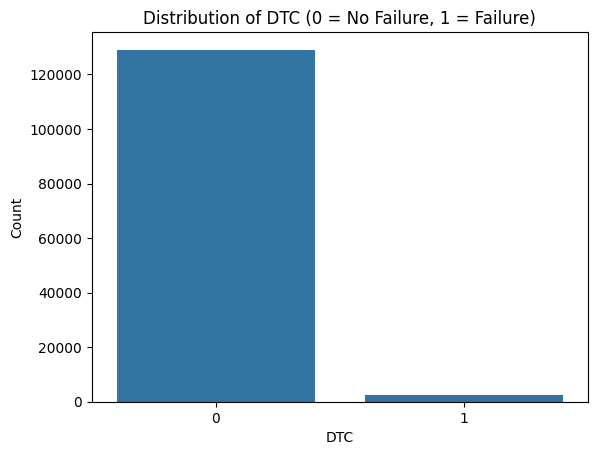

DTC Value Counts:
DTC
0    129073
1      2323
Name: count, dtype: int64

Percentage:
DTC
0    98.232062
1     1.767938
Name: proportion, dtype: float64


In [28]:
# Step 5: Check the distribution of the target variable (DTC)
sns.countplot(x='DTC', data=df)
plt.title("Distribution of DTC (0 = No Failure, 1 = Failure)")
plt.xlabel("DTC")
plt.ylabel("Count")
plt.show()

# Print value counts
print("DTC Value Counts:")
print(df['DTC'].value_counts())
print("\nPercentage:")
print(df['DTC'].value_counts(normalize=True) * 100)


In [20]:
# Step 6: Define the input features and target variable
features = ['SOC', 'SOH', 'Charging_Cycles', 'Battery_Temp', 'Motor_RPM',
            'Motor_Torque', 'Motor_Temp', 'Brake_Pad_Wear', 'Charging_Voltage', 'Tire_Pressure']

X = df[features]
y = df['DTC']

# Confirm the dimensions of the input and output
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)


Shape of X (features): (131396, 10)
Shape of y (target): (131396,)


In [25]:
# Step 7: Split the data into training and testing sets (with stratification)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Confirm shapes
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

# Check class distribution in training and test sets
print("\nTraining set class distribution:")
print(y_train.value_counts(normalize=True) * 100)

print("\nTest set class distribution:")
print(y_test.value_counts(normalize=True) * 100)


Training set shape: (105116, 10) (105116,)
Test set shape: (26280, 10) (26280,)

Training set class distribution:
DTC
0    98.232429
1     1.767571
Name: proportion, dtype: float64

Test set class distribution:
DTC
0    98.230594
1     1.769406
Name: proportion, dtype: float64


In [26]:
# Step 8: Scale features for Logistic Regression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Confirm shapes
print("Scaled training features shape:", X_train_scaled.shape)
print("Scaled test features shape:", X_test_scaled.shape)


Scaled training features shape: (105116, 10)
Scaled test features shape: (26280, 10)


In [29]:
# Step 9: Train Logistic Regression model

# Initialize and train the model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]  # For ROC AUC


In [52]:
# Step 10: Evaluate model performance
print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_proba_lr))


Logistic Regression Evaluation:
Accuracy: 0.9823059360730594
Balanced Accuracy: 0.5
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC: 0.8368597901944981


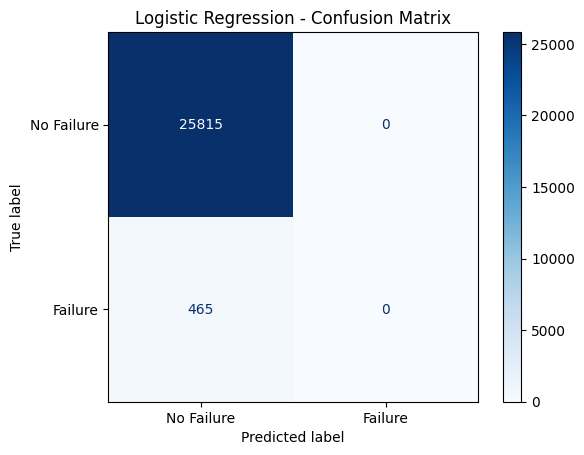

In [31]:
# Step 11: Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Failure', 'Failure'])
disp.plot(cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


In [34]:
# Step 12: Train Decision Tree model

# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]


In [35]:
# Step 13: Evaluate model performance
print("Decision Tree Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print("ROC AUC:", roc_auc_score(y_test, y_proba_dt))


Decision Tree Evaluation:
Accuracy: 1.0
Balanced Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC: 1.0


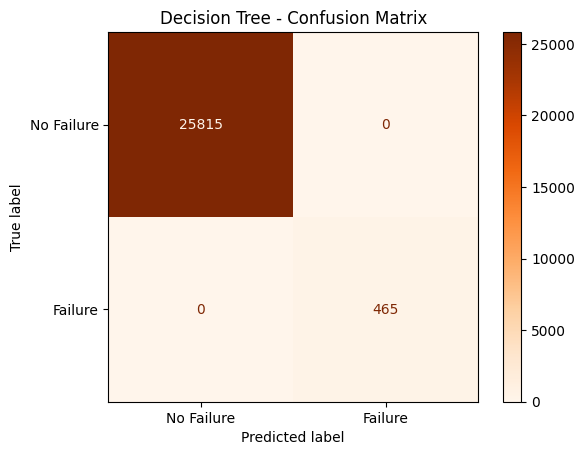

In [36]:
# Step 14: Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Failure', 'Failure'])
disp.plot(cmap='Oranges')
plt.title("Decision Tree - Confusion Matrix")
plt.show()


In [39]:
# Step 15: Train Random Forest model

# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]


In [40]:
# Step 16: Evaluate model performance
print("Random Forest Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))


Random Forest Evaluation:
Accuracy: 1.0
Balanced Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC: 1.0


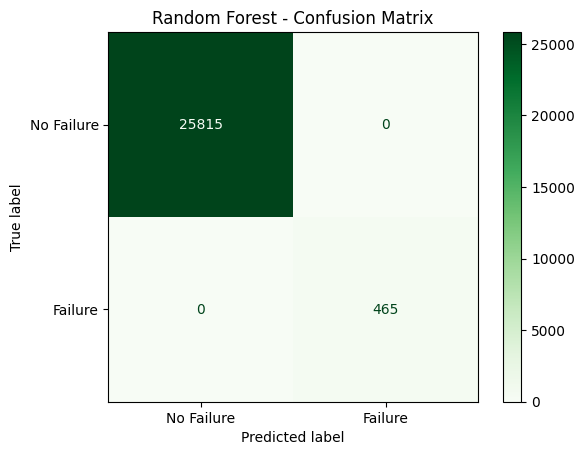

In [41]:
# Step 17: Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Failure', 'Failure'])
disp.plot(cmap='Greens')
plt.title("Random Forest - Confusion Matrix")
plt.show()


In [55]:
# Step 18: Train XGBoost model

# Initialize and train the model (basic parameters)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]


In [56]:
# Step 19: Evaluate model performance
print("XGBoost Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_proba_xgb))


XGBoost Evaluation:
Accuracy: 0.9954718417047184
Balanced Accuracy: 0.9163908205406959
Precision: 0.9023255813953488
Recall: 0.8344086021505376
F1 Score: 0.8670391061452514
ROC AUC: 0.9970832994903772


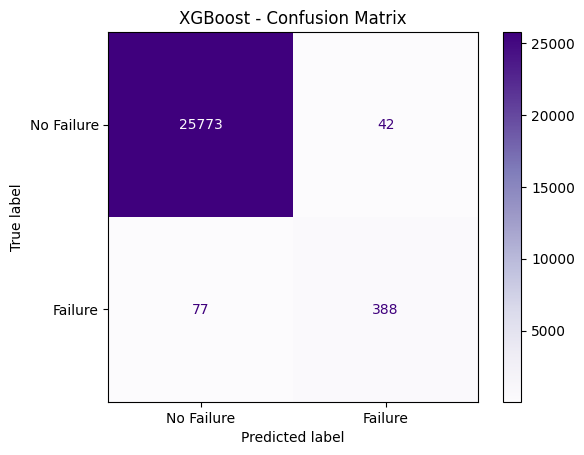

In [57]:
# Step 20: Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Failure', 'Failure'])
disp.plot(cmap='Purples')
plt.title("XGBoost - Confusion Matrix")
plt.show()


In [58]:
# Step 21: Create a comparison table of all models
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    'Balanced Accuracy': [
        balanced_accuracy_score(y_test, y_pred_lr),
        balanced_accuracy_score(y_test, y_pred_dt),
        balanced_accuracy_score(y_test, y_pred_rf),
        balanced_accuracy_score(y_test, y_pred_xgb)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_xgb)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_xgb)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb)
    ],
    'ROC AUC': [
        roc_auc_score(y_test, y_proba_lr),
        roc_auc_score(y_test, y_proba_dt),
        roc_auc_score(y_test, y_proba_rf),
        roc_auc_score(y_test, y_proba_xgb)
    ]
})

# Round for readability
results_rounded = results.round(4)

# Display the table
results_rounded


Model  Accuracy  Balanced Accuracy  Precision  Recall  \
0  Logistic Regression    0.9823             0.5000     0.0000  0.0000   
1        Decision Tree    1.0000             1.0000     1.0000  1.0000   
2        Random Forest    1.0000             1.0000     1.0000  1.0000   
3              XGBoost    0.9955             0.9164     0.9023  0.8344   

   F1 Score  ROC AUC  
0     0.000   0.8369  
1     1.000   1.0000  
2     1.000   1.0000  
3     0.867   0.9971

In [59]:
# Step 22: Export comparison table to CSV
results_rounded.to_csv('Data/model_comparison_unbalanced.csv', index=False)

print("✅ Model comparison saved as 'model_comparison_unbalanced.csv'")


✅ Model comparison saved as 'model_comparison_unbalanced.csv'


In [61]:
#Save models

#Logistic Regression
dump(lr_model, 'Models/Logistic_Regression_Imbalance.joblib')

#Decision Tree
dump(dt_model, 'Models/Decision_Tree_Imbalance.joblib')

#Random Forest
dump(rf_model, 'Models/Random_Forest_Imbalance.joblib')

#XGBoost
dump(xgb_model, 'Models/XGBoost_Imbalance.joblib')

['Models/XGBoost_Imbalance.joblib']